<h2>Pivot-taulukot</h2>

Pivot-taulukoita luon <b>pivot_table()</b> -funktiolla. Keskeisiä parametreja ovat
<ul>
    <li><b>values</b> - laskettavat muuttujat.</li>
    <li><b>index</b> - rivimuuttujat.</li>
    <li><b>columns</b> - sarakemuuttujat.</li>
    <li><b>aggfunc</b> - arvojen laskentamenetelmät (oletuksena pivot-taulukkoon lasketaan keskiarvot).</li>
</ul>

In [1]:
#Tuon tarvittavat kirjastot:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Avaan datan
df=pd.read_excel('http://taanila.fi/happy.xlsx')
df.head()

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Afghanistan,Southern Asia,153.0,3.575,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210,2015
1,Albania,Central and Eastern Europe,95.0,4.959,0.87867,0.80434,0.81325,0.35733,0.06413,0.14272,1.89894,2015
2,Algeria,Middle East and Northern Africa,68.0,5.605,0.93929,1.07772,0.61766,0.28579,0.17383,0.07822,2.43209,2015
3,Angola,Sub-Saharan Africa,137.0,4.033,0.75778,0.86040,0.16683,0.10384,0.07122,0.12344,1.94939,2015
4,Argentina,Latin America and Caribbean,30.0,6.574,1.05351,1.24823,0.78723,0.44974,0.08484,0.11451,2.83600,2015


In [3]:
#Pivot-taulukko, jonka arvoina onnellisuuspistemäärien keskiarvot ja riveillä vuodet:
df.pivot_table(values = 'Happiness Score', index = 'Year')

,Happiness Score
Year,
2015,5.375734
2016,5.382185
2017,5.354019


In [4]:
#Rajoitun vuoteen 2017 ja otan riveille alueet. 
#Järjestän keskiarvon mukaiseen laskevaan järjestykseen:
df[df['Year']==2017].pivot_table(values = 'Happiness Score', 
                index = 'Region').sort_values(by = 'Happiness Score', ascending = False)

,Happiness Score
Region,
Australia and New Zealand,7.299000
North America,7.154500
Western Europe,6.703714
Latin America and Caribbean,5.957818
Eastern Asia,5.646667
Southeastern Asia,5.444875
Central and Eastern Europe,5.409931
Middle East and Northern Africa,5.369684
Southern Asia,4.628429


Text(0.5, 0, 'Happiness Score Mean')

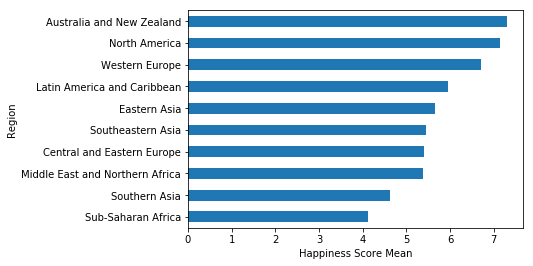

In [5]:
#Sama vaakapylväinä:
ax = df[df['Year']==2017].pivot_table(values='Happiness Score', 
                index='Region').sort_values('Happiness Score').plot.barh(legend=False)

ax.set_xlabel('Happiness Score Mean')

In [6]:
#Riveille voin ottaa useampiakin muuttujia:
df.pivot_table(values = 'Happiness Score', index = ['Region', 'Year'])

Happiness Score
Region                          Year                 
Australia and New Zealand       2015         7.285000
                                2016         7.323500
                                2017         7.299000
Central and Eastern Europe      2015         5.332931
                                2016         5.370690
                                2017         5.409931
Eastern Asia                    2015         5.626167
                                2016         5.624167
                                2017         5.646667
Latin America and Caribbean     2015         6.144682
                                2016         6.101750
                                2017         5.957818
Middle East and Northern Africa 2015         5.406900
                                2016         5.386053
                                2017         5.369684
North America                   2015         7.273000
                                2016         7.254000
                                2017         7.154500
Southeastern Asia               2015         5.317444
                                2016         5.338889
                                2017         5.444875
Southern Asia                   2015         4.580857
                                2016         4.563286
                                2017         4.628429
Sub-Saharan Africa              2015         4.202800
                                2016         4.136421
                                2017         4.111949
Western Europe                  2015         6.689619
                                2016         6.685667
                                2017         6.703714

In [7]:
#Sarakkeissa (columns) vuodet.
#Lopuksi vielä muotoilen kahden desimaalin tarkkuuteen:
df.pivot_table(values = 'Happiness Score', index = 'Region', 
               columns = 'Year').style.format('{:.2f}')

Year,2015,2016,2017
Region,,,
Australia and New Zealand,7.29,7.32,7.30
Central and Eastern Europe,5.33,5.37,5.41
Eastern Asia,5.63,5.62,5.65
Latin America and Caribbean,6.14,6.10,5.96
Middle East and Northern Africa,5.41,5.39,5.37
North America,7.27,7.25,7.15
Southeastern Asia,5.32,5.34,5.44
Southern Asia,4.58,4.56,4.63
Sub-Saharan Africa,4.20,4.14,4.11


In [12]:
#aggfunc määrittää laskettavien arvojen laskentamenetelmät.
#Huomaa, että tässä käytetään numpy-kirjaston funktioita (paitsi len):
df1 = df[df['Year']==2017].pivot_table(values = 'Happiness Score', 
            index = 'Region',aggfunc = [np.mean, np.median, np.min, np.max, np.std, len])

#Lyhyemmät otsikot:
df1.columns=['Mean','Median','Min','Max','Stdev','Count']

#Kahden desimaalin tarkkuus paitsi lukumäärään.
#Tämä vaatii melkoisen hyvää syntaksin hallintaa:
df1.style.format({'Mean':'{:.2f}','Median':'{:.2f}','Min':'{:.2f}','Max':'{:.2f}',
                  'Stdev':'{:.2f}','Count':'{:.0f}'})

,Mean,Median,Min,Max,Stdev,Count
Region,,,,,,
Australia and New Zealand,7.30,7.30,7.28,7.31,0.02,2
Central and Eastern Europe,5.41,5.39,4.10,6.61,0.59,29
Eastern Asia,5.65,5.65,4.95,6.42,0.52,8
Latin America and Caribbean,5.96,6.04,3.60,7.08,0.75,24
Middle East and Northern Africa,5.37,5.34,3.46,7.21,0.99,20
North America,7.15,7.15,6.99,7.32,0.23,2
Southeastern Asia,5.44,5.35,4.17,6.57,0.87,9
Southern Asia,4.63,4.61,3.79,5.27,0.50,7
Sub-Saharan Africa,4.11,4.12,2.69,5.63,0.60,43


In [9]:
#Rajoitun edellisessä alueisiin, joiden nimessä esiintyy 'Asia':
df2 = df1[df1.index.str.contains('Asia')]

#Sattuneesta syystä kopioin style.format osuuden edellisestä solusta:
df2.style.format({'Mean':'{:.2f}','Median':'{:.2f}','Min':'{:.2f}','Max':'{:.2f}',
                  'Standard dev.':'{:.2f}','Count':'{:.0f}'})

,Mean,Median,Min,Max,Stdev,Count
Region,,,,,,
Eastern Asia,5.65,5.65,4.95,6.42,0.521728,8
Southeastern Asia,5.44,5.35,4.17,6.57,0.865941,9
Southern Asia,4.63,4.61,3.79,5.27,0.499732,7


In [10]:
#Jaan onnellisuuspisteet neljänneksiin:
score4 = pd.qcut(df[df['Year']==2017]['Happiness Score'], 4)

#Käytän neljänneksiä (score4) ryhmittelevänä rivimuuttujana:
df3 = df[df['Year']==2017].pivot_table(values = 'Happiness Score', 
                                 index = ['Region', score4], aggfunc = len)

#Ilman desimaaleja:
df3.style.format('{:.0f}')

In [11]:
#Lasken myös kokonaismäärän (margins)
df4 = df[df['Year']==2017].pivot_table(values = 'Happiness Score', 
    index = ['Region', score4],aggfunc = len, margins = True, margins_name = 'Total count')

df4.style.format('{:.0f}')